# Lab | Multi-modal output agent

**Create another version of the prompts below to query the dall-e vision AI model following the example shown in this notebook.**

# Multi-modal outputs: Image & Text

This notebook shows how non-text producing tools can be used to create multi-modal agents.

This example is limited to text and image outputs and uses UUIDs to transfer content across tools and agents. 

This example uses Steamship to generate and store generated images. Generated are auth protected by default. 

You can get your Steamship api key here: https://steamship.com/account/api

In [78]:
# !pip install steamship > /dev/null
# !pip install langchainhub

In [1]:
import re

from IPython.display import Image, display
from steamship import Block, Steamship

In [5]:
from langchain.agents import AgentType, initialize_agent
from langchain.agents import AgentExecutor, create_react_agent
from langchain_openai import OpenAI
from langchain import hub
from langchain.tools import SteamshipImageGenerationTool as OriginalSteamshipImageGenerationTool

In [7]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

OPENAI_API_KEY  = os.getenv('OPENAI_API_KEY')
STEAMSHIP_API_KEY = os.getenv('STEAMSHIP_API_KEY')

In [8]:
llm = OpenAI(temperature=0)

## Dall-E 

In [9]:
class SteamshipImageGenerationTool(OriginalSteamshipImageGenerationTool):
    pass
SteamshipImageGenerationTool.update_forward_refs()

In [10]:
tools = [SteamshipImageGenerationTool(model_name="dall-e")]

In [11]:
mrkl = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)

# prompt = hub.pull("hwchase17/react")
# agent = create_react_agent(llm=llm, tools=tools, prompt=prompt)
# agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

/Users/pedrorenan/.pyenv/versions/3.11.4/envs/ironhack/lib/python3.11/site-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 0.3.0. Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.
  warn_deprecated(


In [19]:
output = mrkl.invoke("How would you visualize a parrot playing soccer?")



> Entering new AgentExecutor chain...
 I should use the generate_image tool to create an image of a parrot playing soccer.
Action: generate_image
Action Input: "A parrot playing soccer on a green field with a soccer ball at its feet and a crowd of animals cheering in the background."
Observation: AD88CEA5-2118-4441-8C6C-0BE7325D96CC
Thought: I should use the UUID to access the generated image.
Action: Access generated image
Action Input: AD88CEA5-2118-4441-8C6C-0BE7325D96CC
Observation: Access generated image is not a valid tool, try one of [generate_image].
Thought: I should use the generate_image tool to view the generated image.
Action: generate_image
Action Input: AD88CEA5-2118-4441-8C6C-0BE7325D96CC
Observation: 3D1C06D6-4292-48BF-A0D5-1318AD7B4C3C
Thought: I now know the final answer.
Final Answer: 3D1C06D6-4292-48BF-A0D5-1318AD7B4C3C

> Finished chain.


In [20]:
def show_output(output):
    """Display the multi-modal output from the agent."""
    UUID_PATTERN = re.compile(
        r"([0-9A-Za-z]{8}-[0-9A-Za-z]{4}-[0-9A-Za-z]{4}-[0-9A-Za-z]{4}-[0-9A-Za-z]{12})"
    )

    outputs = UUID_PATTERN.split(output)
    outputs = [
        re.sub(r"^\W+", "", el) for el in outputs
    ]  # Clean trailing and leading non-word characters

    for output in outputs:
        maybe_block_id = UUID_PATTERN.search(output)
        if maybe_block_id:
            display(Image(Block.get(Steamship(), _id=maybe_block_id.group()).raw()))
        else:
            print(output, end="\n\n")

In [21]:
output

{'input': 'How would you visualize a parrot playing soccer?',
 'output': '3D1C06D6-4292-48BF-A0D5-1318AD7B4C3C'}

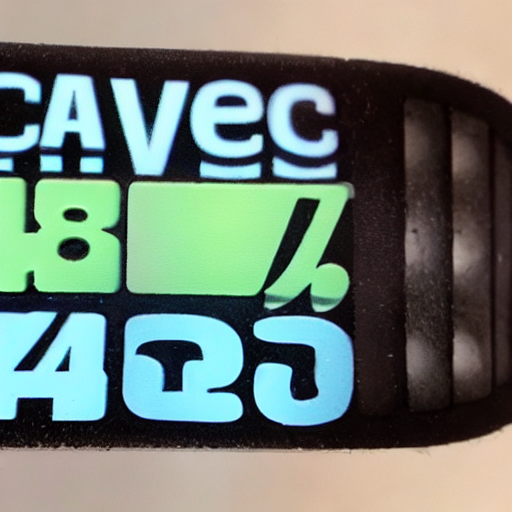

In [22]:
show_output(output=output['output'])

## StableDiffusion 

In [23]:
tools = [SteamshipImageGenerationTool(model_name="stable-diffusion")]

In [24]:
mrkl = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)

In [25]:
output = mrkl.run("How would you visualize a parrot playing soccer?")



> Entering new AgentExecutor chain...
 I should use the generate_image tool to create an image of a parrot playing soccer.
Action: generate_image
Action Input: "A parrot playing soccer with a soccer ball at its feet, wearing a jersey with the number 10 on it."
Observation: 16F475FF-E0F4-437B-99DB-BFA3CB088FB2
Thought: I should use the UUID to access the generated image.
Action: Access generated image
Action Input: 16F475FF-E0F4-437B-99DB-BFA3CB088FB2
Observation: Access generated image is not a valid tool, try one of [generate_image].
Thought: I should use the generate_image tool to view the generated image.
Action: generate_image
Action Input: 16F475FF-E0F4-437B-99DB-BFA3CB088FB2
Observation: D8A5DCE7-755A-4E60-A5FA-2DC5C2528B85
Thought: I now know the final answer.
Final Answer: D8A5DCE7-755A-4E60-A5FA-2DC5C2528B85

> Finished chain.


In [26]:
output

'D8A5DCE7-755A-4E60-A5FA-2DC5C2528B85'

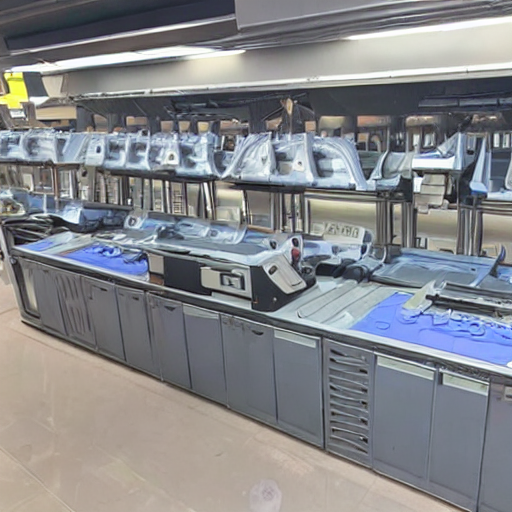

In [27]:
show_output(output=output)